In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')

flight = pd.read_excel('/content/drive/My Drive/flight price prediction/Data_Train (1).xlsx')
flight.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2022,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,2022-01-05 00:00:00,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,2022-09-06 00:00:00,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,2022-12-05 00:00:00,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,2022-01-03 00:00:00,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [ ]:
flight.shape

(10683, 11)

In [ ]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
flight['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
1h 25m     135
2h 15m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h          64
9h 50m      64
5h          63
11h 45m     62
11h         62
5h 15m      62
1h 20m      61
14h 25m     61
6h 35m      60
10h 30m     57
22h 55m     57
12h 10m     57
12h 45m     56
5h 45m      54
16h 5m      53
11h 30m     52
7h 20m      52
12h 30m     52
4h 55m      51
15h 10m     51
8h 25m      50
10h 15m     50
12h         49
10h         49
10h 25m     49
12h 15m     48
6h 15m      47
11h 5m      45
5h 20m      45
26h 55m     44
9h 15m      42
14h 5m      42
13h         42
8h 55m      42
9h 20m      41
20h 10m     41
9h 35m      41
3h 10m      40
17h 5m      40
23h 40m     40
21h 15m     39
26h 35m     39
27h 35m   

In [ ]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
flight.dropna(inplace=True)
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2022,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,2022-01-05 00:00:00,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,2022-09-06 00:00:00,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,2022-12-05 00:00:00,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,2022-01-03 00:00:00,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [ ]:
flight['Dep_hour'] = pd.to_datetime(flight.Dep_Time ).dt.hour
flight['Dep_Minute'] = pd.to_datetime(flight.Dep_Time ).dt.minute
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_Minute
0,IndiGo,24/03/2022,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,22,20
1,Air India,2022-01-05 00:00:00,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,5,50
2,Jet Airways,2022-09-06 00:00:00,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,25
3,IndiGo,2022-12-05 00:00:00,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,18,5
4,IndiGo,2022-01-03 00:00:00,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,16,50


In [ ]:
flight['Arrival_hour'] = pd.to_datetime(flight.Arrival_Time ).dt.hour
flight['Arrival_Minute'] = pd.to_datetime(flight.Arrival_Time ).dt.minute
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,IndiGo,24/03/2022,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,22,20,1,10
1,Air India,2022-01-05 00:00:00,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,5,50,13,15
2,Jet Airways,2022-09-06 00:00:00,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,25,4,25
3,IndiGo,2022-12-05 00:00:00,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,18,5,23,30
4,IndiGo,2022-01-03 00:00:00,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,16,50,21,35


In [ ]:
duration = list(flight.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration
duration_hour=[]
duration_minute=[]

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0] ))
    duration_minute.append(int( duration[i].split('m')[0].split()[-1] ))

In [ ]:
flight['Duration_Hour'] = duration_hour
flight['Duration_Minute'] = duration_minute

In [ ]:
flight.drop(columns='Duration',inplace=True)

In [ ]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,24/03/2022,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897.0,22,20,1,10,2,50
1,Air India,2022-01-05 00:00:00,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662.0,5,50,13,15,7,25
2,Jet Airways,2022-09-06 00:00:00,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882.0,9,25,4,25,19,0
3,IndiGo,2022-12-05 00:00:00,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218.0,18,5,23,30,5,25
4,IndiGo,2022-01-03 00:00:00,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302.0,16,50,21,35,4,45


In [ ]:
flight['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
Airline = flight['Airline']
Airline = pd.get_dummies(Airline , drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
flight['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
Source = flight[['Source']]

Source = pd.get_dummies(Source , drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
flight['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
flight['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
Destination = flight[['Destination']]

Destination = pd.get_dummies(Destination , drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
flight['Route']

0                                BLR → DEL
1                    CCU → IXR → BBI → BLR
2                    DEL → LKO → BOM → COK
3                          CCU → NAG → BLR
4                          BLR → NAG → DEL
5                                CCU → BLR
6                          BLR → BOM → DEL
7                          BLR → BOM → DEL
8                          BLR → BOM → DEL
9                          DEL → BOM → COK
10                         DEL → BLR → COK
11                               CCU → BLR
12                               MAA → CCU
13                         CCU → BOM → BLR
14                               CCU → BLR
15                   DEL → AMD → BOM → COK
16                         DEL → PNQ → COK
17                         DEL → BOM → COK
18                   DEL → CCU → BOM → COK
19                         DEL → BOM → COK
20                         DEL → BOM → COK
21                         BLR → COK → DEL
22                               BLR → DEL
23         

In [ ]:
flight.drop(columns=['Route','Additional_Info'],axis=1 , inplace=True)

In [ ]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,24/03/2022,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,3897.0,22,20,1,10,2,50
1,Air India,2022-01-05 00:00:00,Kolkata,Banglore,05:50,13:15,2 stops,7662.0,5,50,13,15,7,25
2,Jet Airways,2022-09-06 00:00:00,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,13882.0,9,25,4,25,19,0
3,IndiGo,2022-12-05 00:00:00,Kolkata,Banglore,18:05,23:30,1 stop,6218.0,18,5,23,30,5,25
4,IndiGo,2022-01-03 00:00:00,Banglore,New Delhi,16:50,21:35,1 stop,13302.0,16,50,21,35,4,45


In [ ]:
flight.replace( { 'non-stop':0 , '1 stop':1 , '2 stops':2 , '3 stops':3 ,'4 stops':4 } ,inplace=True)

In [ ]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,24/03/2022,Banglore,New Delhi,22:20,01:10 22 Mar,0,3897.0,22,20,1,10,2,50
1,Air India,2022-01-05 00:00:00,Kolkata,Banglore,05:50,13:15,2,7662.0,5,50,13,15,7,25
2,Jet Airways,2022-09-06 00:00:00,Delhi,Cochin,09:25,04:25 10 Jun,2,13882.0,9,25,4,25,19,0
3,IndiGo,2022-12-05 00:00:00,Kolkata,Banglore,18:05,23:30,1,6218.0,18,5,23,30,5,25
4,IndiGo,2022-01-03 00:00:00,Banglore,New Delhi,16:50,21:35,1,13302.0,16,50,21,35,4,45


In [ ]:
flight['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [ ]:
flight.drop(columns = [ 'Airline' , 'Source' , 'Destination' ] , inplace=True)
flight.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Total_Stops,Price,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,24/03/2022,22:20,01:10 22 Mar,0,3897.0,22,20,1,10,2,50
1,2022-01-05 00:00:00,05:50,13:15,2,7662.0,5,50,13,15,7,25
2,2022-09-06 00:00:00,09:25,04:25 10 Jun,2,13882.0,9,25,4,25,19,0
3,2022-12-05 00:00:00,18:05,23:30,1,6218.0,18,5,23,30,5,25
4,2022-01-03 00:00:00,16:50,21:35,1,13302.0,16,50,21,35,4,45


In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
flight.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Total_Stops,Price,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,24/03/2022,22:20,01:10 22 Mar,0,3897.0,22,20,1,10,2,50
1,2022-01-05 00:00:00,05:50,13:15,2,7662.0,5,50,13,15,7,25
2,2022-09-06 00:00:00,09:25,04:25 10 Jun,2,13882.0,9,25,4,25,19,0
3,2022-12-05 00:00:00,18:05,23:30,1,6218.0,18,5,23,30,5,25
4,2022-01-03 00:00:00,16:50,21:35,1,13302.0,16,50,21,35,4,45


In [ ]:
flight = pd.concat( [flight , Airline ,Source , Destination] , axis=1)

In [ ]:
flight.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Total_Stops,Price,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2022,22:20,01:10 22 Mar,0,3897.0,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2022-01-05 00:00:00,05:50,13:15,2,7662.0,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2022-09-06 00:00:00,09:25,04:25 10 Jun,2,13882.0,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,2022-12-05 00:00:00,18:05,23:30,1,6218.0,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2022-01-03 00:00:00,16:50,21:35,1,13302.0,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
flight.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
flight.shape

(10682, 31)

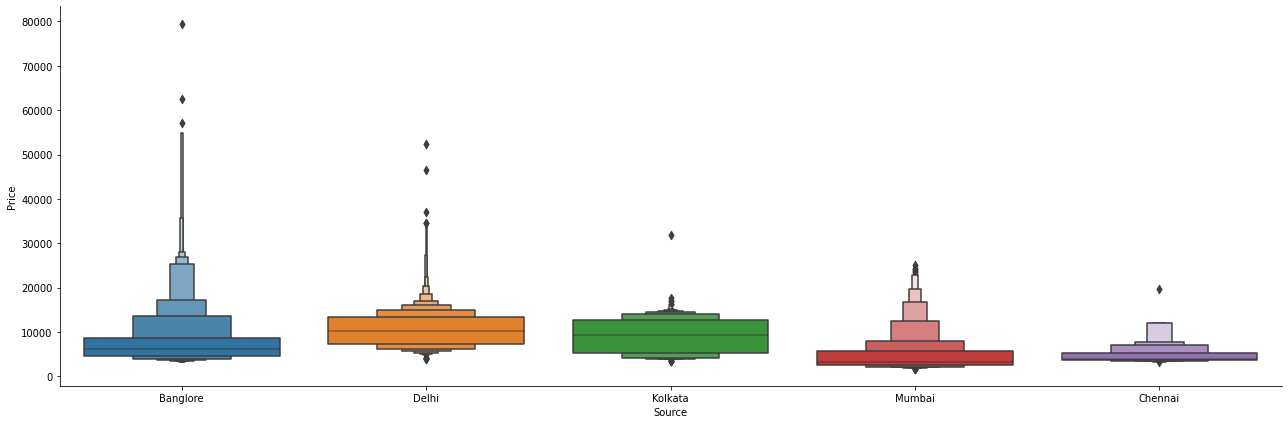

In [ ]:
sns.catplot(y='Price' , x='Source' , data = flight.sort_values('Price',ascending=False) , kind='boxen' , height=6 , aspect=3)

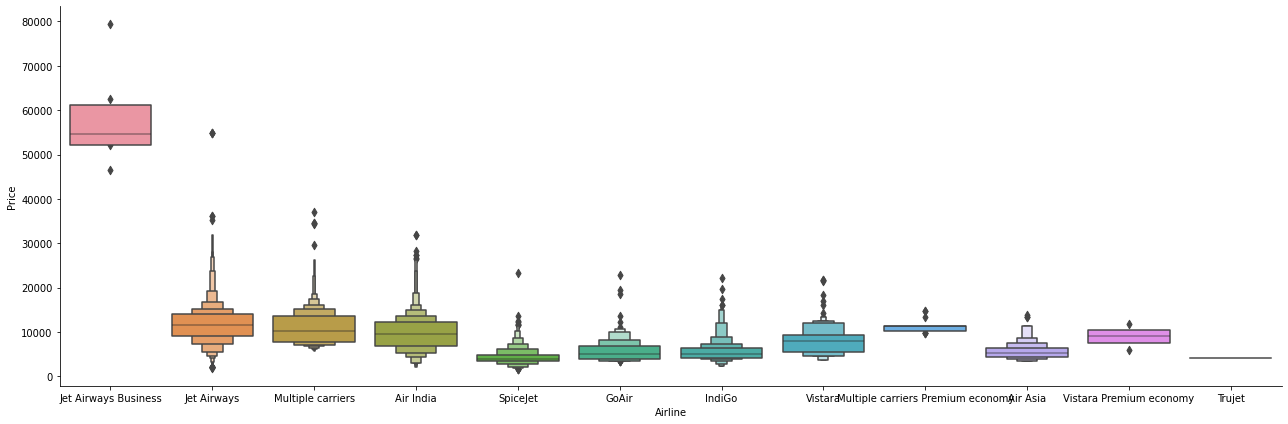

In [ ]:
sns.catplot(y='Price' , x='Airline' , data = flight.sort_values('Price',ascending=False) , kind='boxen' , height=6 , aspect=3)

# **TEST DATA**

In [ ]:
flight_test = pd.read_excel('/content/drive/My Drive/flight price prediction/Data_Test (1).xlsx')
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
print("-"*50)
print("Shape")
print(flight_test.shape)

print("-"*50)
print("Info")
print(flight_test.info())

print("-"*50)
print("Duration count values")
print(flight_test['Duration'].value_counts())

print("-"*50)
print("Check null value")
print(flight_test.isnull().sum())

print("-"*50)
print("Drop null value rows")
flight_test.dropna(inplace=True)

print("-"*50)
print("Check null values")
print(flight_test.isnull().sum())

print("-"*50)
print("Fetch journey day and month from Date_of_Journey")
flight_test['Journey_Day'] = pd.to_datetime(flight_test.Date_of_Journey , format = '%d/%m/%Y').dt.day
flight_test['Journey_Month'] = pd.to_datetime(flight_test.Date_of_Journey , format = '%d/%m/%Y').dt.month
print(flight_test.head())

print("-"*50)
print("Fetch Departure hours and minutes from Dep_Time")
flight_test['Dep_hour'] = pd.to_datetime(flight_test.Dep_Time ).dt.hour
flight_test['Dep_Minute'] = pd.to_datetime(flight_test.Dep_Time ).dt.minute
print(flight_test.head())

print("-"*50)
print("Drop Dep_time and Date_of_Journey columns")
flight_test.drop(columns=['Dep_Time' , 'Date_of_Journey'],inplace=True)

print("-"*50)
print("Fetch journey hours and minutes from Arrival_Time")
flight_test['Arrival_hour'] = pd.to_datetime(flight_test.Arrival_Time ).dt.hour
flight_test['Arrival_Minute'] = pd.to_datetime(flight_test.Arrival_Time ).dt.minute
print(flight_test.head())

print("-"*50)
print("Drop Arrival_Time columns")
flight_test.drop(columns='Arrival_Time',inplace=True)

print("-"*50)
print("Fetch  hours and minutes from Durations")
duration = list(flight_test.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration
duration_hour=[]
duration_minute=[]

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0] ))
    duration_minute.append(int( duration[i].split('m')[0].split()[-1] ))

flight_test['Duration_Hour'] = duration_hour
flight_test['Duration_Minute'] = duration_minute
flight_test.drop(columns='Duration',inplace=True)

print("-"*50)
print("Count Airline values")
print(flight_test['Airline'].value_counts())


print("-"*50)
print("OneHotEncoder on Airline Column")
Airline = flight_test['Airline']
Airline = pd.get_dummies(Airline , drop_first=True)
print(Airline.head())

print("-"*50)
print("Count Source values")
print(flight_test['Source'].value_counts())


print("-"*50)
print("Count Source values")
print(flight_test['Source'].value_counts())

print("-"*50)
print("OneHotEncoder on Source Column")
Source = flight_test[['Source']]
Source = pd.get_dummies(Source , drop_first=True)
print(Source.head())

print("-"*50)
print("Count Destination values")
print(flight_test['Destination'].value_counts())

print("-"*50)
print("OneHotEncoder on Destination Column")
Destination = flight_test[['Destination']]
Destination = pd.get_dummies(Destination , drop_first=True)
print(Destination.head())

print("-"*50)
print("Show route")
print(flight_test['Route'])

print("-"*50)
print("Drop Route and Additional_Info")
flight_test.drop(columns=['Route','Additional_Info'],axis=1 , inplace=True)

print("-"*50)
print("Cout Total_Stops")
print(flight_test['Total_Stops'].value_counts())

print("-"*50)
print("Normalize total stops")
flight_test.replace( { 'non-stop':0 , '1 stop':1 , '2 stops':2 , '3 stops':3 ,'4 stops':4 } ,inplace=True)

print("-"*50)
print("Concate flight, airline, source and destionation")
flight_test = pd.concat( [flight_test , Airline ,Source , Destination] , axis=1)

print("-"*50)
print("Show all rows and columns")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

print("-"*50)
print("Drop Airline, Source and Destination")
flight_test.drop(columns = [ 'Airline' , 'Source' , 'Destination' ] , inplace=True)

print("-"*50)
print("Show head")
print(flight_test.head())

print("-"*50)
print("Shape")
print(flight_test.shape)

--------------------------------------------------
Shape
(2671, 10)
--------------------------------------------------
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
--------------------------------------------------
Duration count values
2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
2h 35m      70
2h 30m      58
2h 

In [ ]:
flight_test.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
flight.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Total_Stops,Price,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2022,22:20,01:10 22 Mar,0,3897.0,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2022-01-05 00:00:00,05:50,13:15,2,7662.0,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2022-09-06 00:00:00,09:25,04:25 10 Jun,2,13882.0,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,2022-12-05 00:00:00,18:05,23:30,1,6218.0,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2022-01-03 00:00:00,16:50,21:35,1,13302.0,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# **Feature Selection**

In [ ]:
flight.shape , flight_test.shape

((10682, 31), (2671, 28))

In [ ]:
X = flight.drop(columns='Price',axis=1)
y = flight['Price']
X.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2022,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,2022-01-05 00:00:00,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,2022-09-06 00:00:00,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,2022-12-05 00:00:00,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,2022-01-03 00:00:00,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


In [ ]:
y.head(10)

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
5     3873.0
6    11087.0
7    22270.0
8    11087.0
9     8625.0
Name: Price, dtype: float64